<a href="https://colab.research.google.com/github/mlfa19/assignments/blob/master/Module%202/01/Assignment_1_Companion_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 Companion Notebook

In this notebook you'll be applying Bayesian analysis to a couple of problems.  The presentation will follow Allen's workshop from PyCon [Bayes Made Simple](https://github.com/AllenDowney/BayesMadeSimple).

First, install some packages and import the necessary libraries.

In [1]:
!pip install empyrical-dist

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

import matplotlib.pyplot as plt

from empyrical_dist import Pmf

  Created wheel for empyrical-dist: filename=empyrical_dist-0.2.0-cp36-none-any.whl size=8074 sha256=d24acf9f5d2ec5003a6e27510b6cc8693579132bcd75c60e13126e04055bfbd9
  Stored in directory: /root/.cache/pip/wheels/b5/33/56/c1f9f4c185160b176514f3d2550eabaf9a2cd514ec033ebba6
Successfully built empyrical-dist


### Working with Pmfs

*Recall from the main assignment document that a PMF (probability mass function) specifies the probability that a random variable takes on a particular value.  In this problem we can think of the random variable $X$ as representing the outcome of rolling a single, six-sided die.*

Create a Pmf object to represent a six-sided die.

In [0]:
d6 = Pmf()

A Pmf is a map from possible outcomes to their probabilities.

In [0]:
for x in [1,2,3,4,5,6]:
    d6[x] = 1

Initially the probabilities don't add up to 1. *Just as a probability measure must add to 1 when summed over a set of mutually exclusive, exhaustive events, a PMF must also add to 1*

In [4]:
d6

,probs
1,1
2,1
3,1
4,1
5,1
6,1


`normalize` adds up the probabilities and divides through.  The return value is the total probability before normalizing.

In [5]:
d6.normalize()

6

Now the Pmf is normalized.

In [6]:
d6

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


And we can compute its mean (which only works if it's normalized).

In [7]:
d6.mean()

3.5

### The cookie problem

The setup of this problem is in the chapter 1 reading from Think Bayes.  The relevant part is that you have two bowls of cookies.  Bowl 1 contains 3/4 vanilla cookies and 1/4 chocolate and bowl 2 contains 1/2 vanilla cookies and 1/2 chocolate.

`Pmf.from_seq` makes a `Pmf` object from a sequence of values.

Here's how we can use it to create a `Pmf` with two equally likely hypotheses.

In [11]:
cookie = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
cookie

,probs
Bowl 1,0.5
Bowl 2,0.5


Now we can update each hypothesis with the likelihood of the data (a vanilla cookie).  *This is Bayes' rule in action!*

In [12]:
cookie['Bowl 1'] *= 0.75
cookie['Bowl 2'] *= 0.5
cookie.normalize()

0.625

And display the posterior probabilities.

In [13]:
cookie

,probs
Bowl 1,0.6
Bowl 2,0.4


You might be wondering what happened to the denominator in Bayes' rule.  You would think that to update the probability of bowl 1 you should be doing the following calculation:

$$p(\mbox{Bowl 1} | \mbox{vanilla}) = \frac{p(\mbox{vanilla} | \mbox{Bowl 1}) p(\mbox{Bowl 1})}{p(\mbox{vanilla})}$$ .

in Allen's code, all he does is multiply the prior by the likelihood (the numerator of the previous equation).  It turns out that applying the *normalize* function will have the same effect as dividing by $p(\mbox{vanilla})$.  You can take this on faith, or show why this is true yourself (it should be pretty straightforward, post on NB if you need help).

### *Notebook Exercise 1*

Suppose we put the first cookie back, stir, choose again from the same bowl, and get a chocolate cookie.  

What are the posterior probabilities after the second cookie?

Hint: The posterior (after the first cookie) becomes the prior (before the second cookie).

#### *Expand for Solution*

***Solution***

In [0]:
# ***Solution***
cookie['Bowl 1'] *= 0.25
cookie['Bowl 2'] *= 0.5
cookie.normalize()
cookie

### The dice problem

Create a Suite to represent dice with different numbers of sides (in this case 4, 6, 8, and 12).

In [15]:
dice = Pmf.from_seq([4, 6, 8, 12])
dice

,probs
4,0.25
6,0.25
8,0.25
12,0.25


### *Notebook Exercise 2*

We'll solve this problem two ways.  First we'll do it "by hand", as we did with the cookie problem; that is, we'll multiply each hypothesis by the likelihood of the data, and then renormalize.

Update `dice` based on the likelihood of the data (rolling a 6), then normalize and display the results.

#### *Expand for Solution*

***Solution***

In [0]:
# ***Solution***
dice[4] *= 0
dice[6] *= 1/6
dice[8] *= 1/8
dice[12] *= 1/12
dice.normalize()
dice

### *Notebook Exercise 3*

Now let's do the same calculation using `Pmf.update`, which encodes the structure of a Bayesian update.

Define a function called `likelihood_dice` that takes `data` and `hypo` and returns the probability of the data (the outcome of rolling the die) for a given hypothesis (number of sides on the die).

Hint: What should you do if the outcome exceeds the hypothetical number of sides on the die?

Here's an outline to get you started.

In [0]:
def likelihood_dice(data, hypo):
    """Likelihood function for the dice problem.
    
    data: outcome of the die roll
    hypo: number of sides
    
    returns: float probability
    """
    # TODO: fill this in!
    return 1

#### *Expand for Solution*

***Solution***

In [0]:
# ***Solution***
def likelihood_dice(data, hypo):
    """Likelihood function for the dice problem.
    
    data: outcome of the die roll
    hypo: number of sides
    
    returns: float probability
    """
    if data > hypo:
        return 0
    return 1/hypo

In [0]:
# ***Solution***
# make sure to start with a fresh Pmf (what would happen if you don't?)
dice = Pmf.from_seq([4, 6, 8, 12])
dice.update(likelihood_dice, 6)
dice

### More Fun with Dice

If we get more data, we can perform more updates.

In [0]:
for roll in [8, 7, 7, 5, 4]:
    dice.update(likelihood_dice, roll)

Here are the results.

In [22]:
dice

,probs
4,0.000000
6,0.000000
8,0.919294
12,0.080706


### The German tank problem

The [German tank problem](https://en.wikipedia.org/wiki/German_tank_problem) is actually identical to the dice problem.  This one is a cool example, because it was actually used to estimate German monthly tank production during WWII.  Here are the results of the analysis.

| Month |	Statistical estimate |	Intelligence estimate	| German records |
--------| ------- | -------| ----- |
June 1940 |	169	| 1,000 |	122
June 1941 |	244	 | 1,550	| 271
August 1942 |	327 |	1,550 |	342


In [0]:
def likelihood_tank(data, hypo):
    """Likelihood function for the tank problem.
    
    data: observed serial number
    hypo: number of tanks
    
    returns: float probability
    """
    if data > hypo:
        return 0
    else:
        return 1 / hypo

Here is the update after seeing Tank #42.

In [24]:
tank = Pmf.from_seq(range(100))
tank.update(likelihood_tank, 42)
tank.mean()

66.32784309363326

And here's what the posterior distribution looks like.

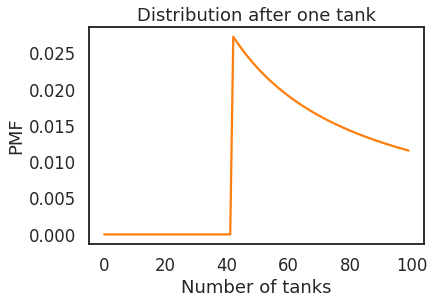

In [27]:
def decorate_tank(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Number of tanks')
    plt.ylabel('PMF')
    plt.title(title)

tank.plot()
decorate_tank('Distribution after one tank')

### *Notebook Exercise 4*

Suppose we see another tank with serial number 17.  What effect does this have on the posterior probabilities?

Update the `Pmf` with the new data and plot the results.

#### *Expand for Solution*

***Solution***

In [0]:
# ***Solution***
tank.update(likelihood_tank, 17)
tank.mean()

In [0]:
# ***Solution***
tank.plot()
decorate_tank('Distribution after two tanks')